In [5]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [7]:
heart_df = pd.read_csv("Desktop/heart.csv")
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
heart_df.shape

(918, 12)

In [10]:
pd.set_option("display.float","{:.2f}".format)
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [11]:
heart_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

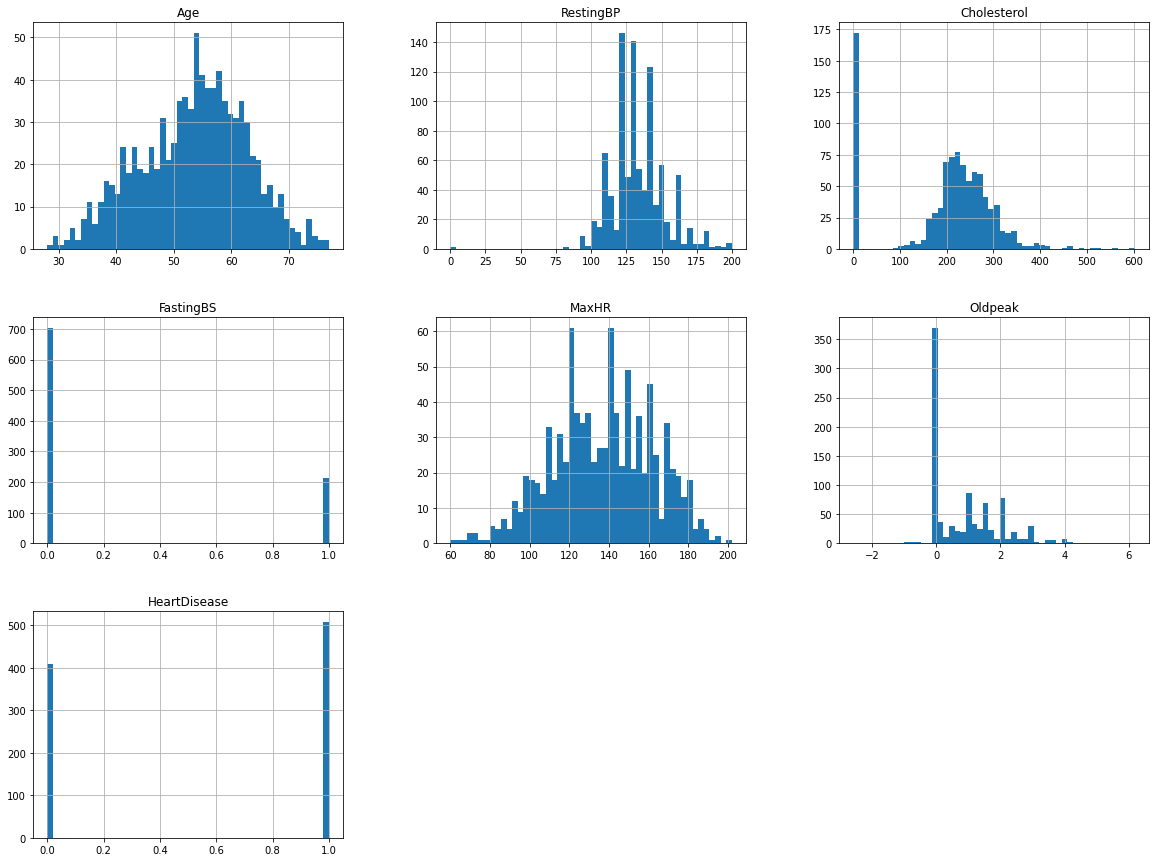

In [12]:
heart_df.hist(bins=50,figsize=(20,15))

In [13]:
for i, col in enumerate(heart_df.columns):
    print(heart_df.columns[i],'::\n', heart_df[str(col)].unique(),'\n\n' )

Age ::
 [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71] 


Sex ::
 ['M' 'F'] 


ChestPainType ::
 ['ATA' 'NAP' 'ASY' 'TA'] 


RestingBP ::
 [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164] 


Cholesterol ::
 [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231

1    508
0    410
Name: HeartDisease, dtype: int64

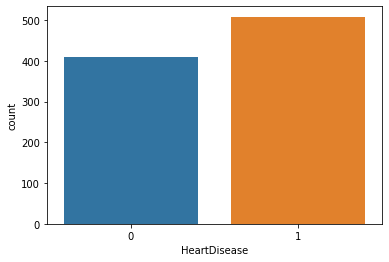

In [14]:
sb.countplot(heart_df.HeartDisease)
heart_df.HeartDisease.value_counts()

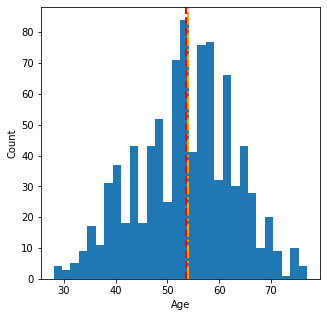

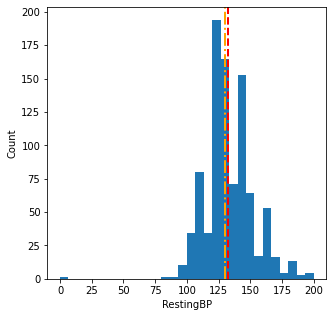

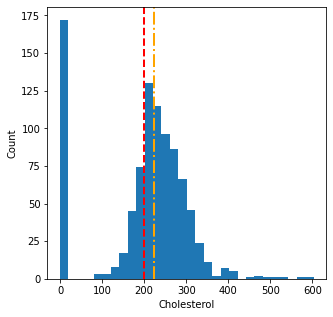

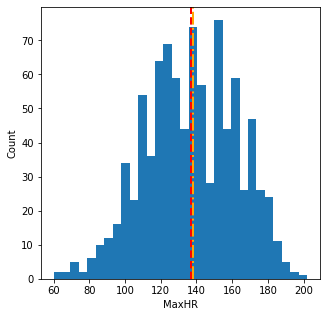

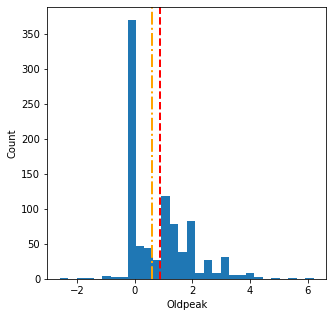

In [15]:
for col in heart_df.select_dtypes(exclude = 'object').columns.drop(['FastingBS', 'HeartDisease']): 
    plt.figure(figsize = [5, 5])
    plt.hist(heart_df[str(col)], bins = 30)
    plt.axvline(x = heart_df[str(col)].mean(), color = 'red', ls = '--', lw = 2)
    plt.axvline(x = heart_df[str(col)].median(), color = 'orange', ls = '-.', lw = 2)
    plt.xlabel(str(col))
    plt.ylabel('Count')
    plt.show()

In [16]:
heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.00,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.00,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.00,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.50,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.00,Up,0


In [17]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

heart_df['Sex'] = le.fit_transform(heart_df['Sex'])
heart_df['ChestPainType'] = le.fit_transform(heart_df['ChestPainType'])
heart_df['RestingECG'] = le.fit_transform(heart_df['RestingECG'])
heart_df['ExerciseAngina'] =  le.fit_transform(heart_df['ExerciseAngina'])
heart_df['ST_Slope'] = le.fit_transform(heart_df['ST_Slope'])

heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0
5,39,1,2,120,339,0,1,170,0,0.00,2,0
6,45,0,1,130,237,0,1,170,0,0.00,2,0
7,54,1,1,110,208,0,1,142,0,0.00,2,0
8,37,1,0,140,207,0,1,130,1,1.50,1,1
9,48,0,1,120,284,0,1,120,0,0.00,2,0


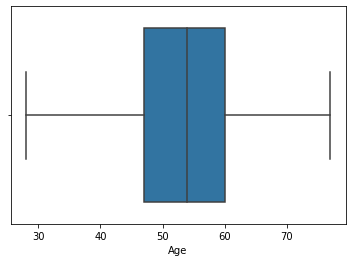

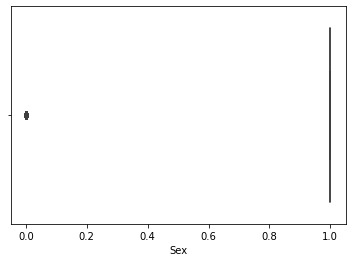

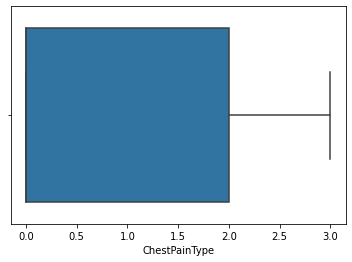

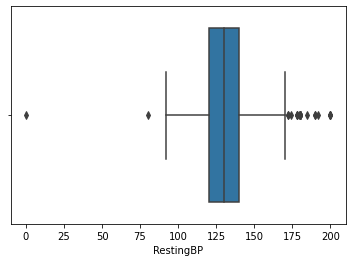

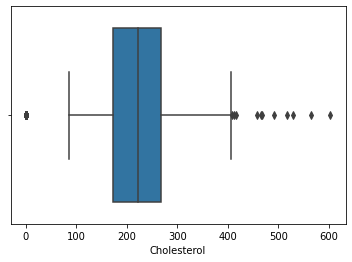

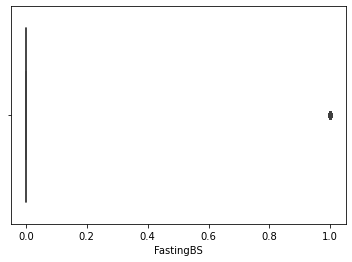

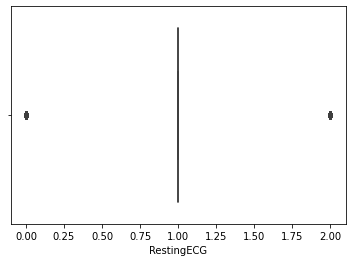

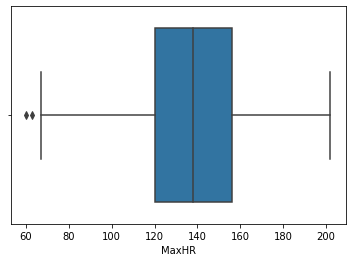

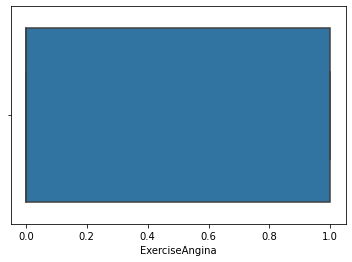

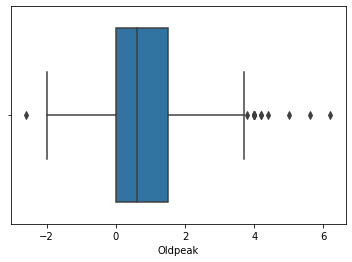

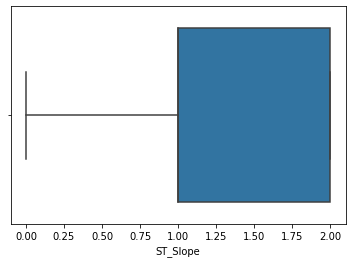

In [18]:
for col in heart_df.columns[:-1]:
    sb.boxplot(heart_df[col]);
    plt.show()

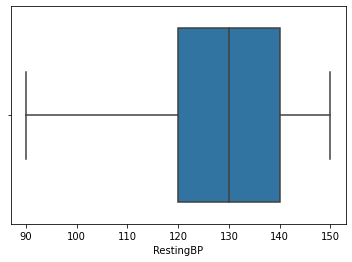

In [19]:
## RestingBP
lower = heart_df['RestingBP'].quantile(0.25) - 1.5 * (heart_df['RestingBP'].quantile(0.75) - 
                                                      heart_df['RestingBP'].quantile(0.25))
upper = heart_df['RestingBP'].quantile(0.25) + 1.5 * (heart_df['RestingBP'].quantile(0.75) - 
                                                      heart_df['RestingBP'].quantile(0.25))

heart_df['RestingBP'] = np.where(heart_df['RestingBP'] > upper, upper, 
                                 np.where(heart_df['RestingBP'] < lower, lower, heart_df['RestingBP']))

sb.boxplot(heart_df['RestingBP']);
plt.show()


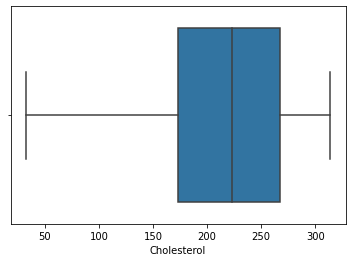

In [20]:
## 'Cholesterol'
lower = heart_df['Cholesterol'].quantile(0.25) - 1.5 * (heart_df['Cholesterol'].quantile(0.75) - 
                                                        heart_df['Cholesterol'].quantile(0.25))
upper = heart_df['Cholesterol'].quantile(0.25) + 1.5 * (heart_df['Cholesterol'].quantile(0.75) - 
                                                        heart_df['Cholesterol'].quantile(0.25))

heart_df['Cholesterol'] = np.where(heart_df['Cholesterol'] > upper, upper, 
                                   np.where(heart_df['Cholesterol'] < lower, lower, heart_df['Cholesterol']))

sb.boxplot(heart_df['Cholesterol']);
plt.show()

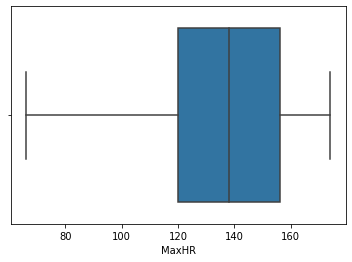

In [21]:
##  'MaxHR'

lower = heart_df['MaxHR'].quantile(0.25) - 1.5 * (heart_df['MaxHR'].quantile(0.75) - 
                                                  heart_df['MaxHR'].quantile(0.25))
upper = heart_df['MaxHR'].quantile(0.25) + 1.5 * (heart_df['MaxHR'].quantile(0.75) - 
                                                  heart_df['MaxHR'].quantile(0.25))

heart_df['MaxHR'] = np.where(heart_df['MaxHR'] > upper, upper, 
                             np.where(heart_df['MaxHR'] < lower, lower, heart_df['MaxHR']))

sb.boxplot(heart_df['MaxHR']);
plt.show()

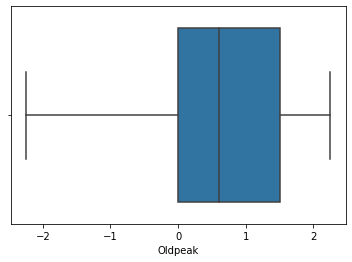

In [22]:
## 'Oldpeak'

lower = heart_df['Oldpeak'].quantile(0.25) - 1.5 * (heart_df['Oldpeak'].quantile(0.75) - 
                                                    heart_df['Oldpeak'].quantile(0.25))
upper = heart_df['Oldpeak'].quantile(0.25) + 1.5 * (heart_df['Oldpeak'].quantile(0.75) - 
                                                    heart_df['Oldpeak'].quantile(0.25))

heart_df['Oldpeak'] = np.where(heart_df['Oldpeak'] > upper, upper, 
                               np.where(heart_df['Oldpeak'] < lower, lower, heart_df['Oldpeak']))

sb.boxplot(heart_df['Oldpeak']);
plt.show()


In [23]:
heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.00,289.00,0,1,172.00,0,0.00,2,0
1,49,0,2,150.00,180.00,0,1,156.00,0,1.00,1,1
2,37,1,1,130.00,283.00,0,2,98.00,0,0.00,2,0
3,48,0,0,138.00,214.00,0,1,108.00,1,1.50,1,1
4,54,1,2,150.00,195.00,0,1,122.00,0,0.00,2,0
5,39,1,2,120.00,313.88,0,1,170.00,0,0.00,2,0
6,45,0,1,130.00,237.00,0,1,170.00,0,0.00,2,0
7,54,1,1,110.00,208.00,0,1,142.00,0,0.00,2,0
8,37,1,0,140.00,207.00,0,1,130.00,1,1.50,1,1
9,48,0,1,120.00,284.00,0,1,120.00,0,0.00,2,0


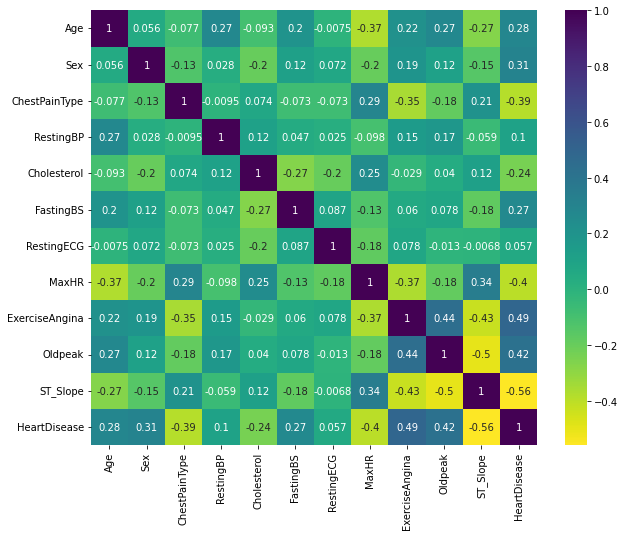

In [24]:
# Heartmap

plt.figure(figsize = [10,8])
sb.heatmap(heart_df.corr(),cmap='viridis_r',annot = True);
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, x_train, Y_train, X_test, Y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(Y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(Y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(Y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(Y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_test, pred)}\n")


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test = train_test_split(heart_df.iloc[:, :-1].values, heart_df.iloc[:, -1].values, 
                                                    test_size = 0.3, random_state = 123)

x_train.shape, x_test.shape, Y_train.shape, Y_test.shape

((642, 11), (276, 11), (642,), (276,))

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_x_train = scaler.fit_transform(x_train)
sc_x_test = scaler.transform(x_test)
sc_x_train,x_train , sc_x_test

(array([[ 0.29076674,  0.51843486, -0.81406539, ...,  1.22793017,
          1.34191799, -0.64106918],
        [-0.55774347, -1.92888264,  0.24819067, ..., -0.81437856,
         -0.91585924,  1.03879373],
        [ 0.18470296,  0.51843486, -0.81406539, ...,  1.22793017,
          1.34191799, -0.64106918],
        ...,
        [-1.08806235,  0.51843486, -0.81406539, ...,  1.22793017,
          1.34191799, -0.64106918],
        [ 1.13927695, -1.92888264, -0.81406539, ...,  1.22793017,
          0.21302937, -0.64106918],
        [ 0.71502185,  0.51843486, -0.81406539, ..., -0.81437856,
         -0.57719266,  1.03879373]]),
 array([[56. ,  1. ,  0. , ...,  1. ,  2. ,  1. ],
        [48. ,  0. ,  1. , ...,  0. ,  0. ,  2. ],
        [55. ,  1. ,  0. , ...,  1. ,  2. ,  1. ],
        ...,
        [43. ,  1. ,  0. , ...,  1. ,  2. ,  1. ],
        [64. ,  0. ,  0. , ...,  1. ,  1. ,  1. ],
        [60. ,  1. ,  0. , ...,  0. ,  0.3,  2. ]]),
 array([[-1.83050879,  0.51843486, -0.81406539, ...,

In [28]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, f1_score, classification_report
lr_model = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 0.1, random_state = 123)

Y_pred = lr_model.fit(sc_x_train, Y_train).predict(sc_x_test)

print('The Recall score for the LogisticRegression model: ', recall_score(Y_test, Y_pred))
print('The corresponding F1-score: ', f1_score(Y_test, Y_pred))
print('\n\n')
print('The corresponding Classification Report: \n', classification_report(Y_test, Y_pred))

The Recall score for the LogisticRegression model:  0.8782051282051282
The corresponding F1-score:  0.853582554517134



The corresponding Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       120
           1       0.83      0.88      0.85       156

    accuracy                           0.83       276
   macro avg       0.83      0.82      0.83       276
weighted avg       0.83      0.83      0.83       276



In [29]:
test_score = accuracy_score(Y_test, lr_model.predict(x_test)) * 100
train_score = accuracy_score(Y_train, lr_model.predict(x_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,45.17,43.48


In [30]:
# Descision Trees
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 10, 
                                  min_samples_split = 2, random_state = 123)

Y_pred = dt_model.fit(sc_x_train, Y_train).predict(sc_x_test)

print('The Recall score for the DecisionTree model: ', recall_score(Y_test, Y_pred))
print('The corresponding F1-score: ', f1_score(Y_test, Y_pred))
print('\n\n')
print('The corresponding Classification Report: \n', classification_report(Y_test, Y_pred))


The Recall score for the DecisionTree model:  0.8333333333333334
The corresponding F1-score:  0.8496732026143791



The corresponding Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       120
           1       0.87      0.83      0.85       156

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



In [31]:
test_score = accuracy_score(Y_test, dt_model.predict(x_test)) * 100
train_score = accuracy_score(Y_train, dt_model.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,45.17,43.48
1,Decision Tree Classifier,49.22,46.74


In [32]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
knn = KNeighborsClassifier(n_neighbors=15)
    
    
knn.fit(x_train, Y_train)
    
    
y_pred = knn.predict(x_test)

    
print(accuracy_score(Y_test, Y_pred))

0.8333333333333334


In [33]:
test_score = accuracy_score(Y_test, knn.predict(x_test)) * 100
train_score = accuracy_score(Y_train, knn.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,45.17,43.48
1,Decision Tree Classifier,49.22,46.74
2,K-nearest neighbors,75.55,71.38


In [34]:
# SVM
from sklearn.svm import SVC

svc_model = SVC(C = 1, gamma = 0.1, random_state = 123)

Y_pred = svc_model.fit(sc_x_train, Y_train).predict(sc_x_test)

print('The Recall score for the SVM model: ', recall_score(Y_test, Y_pred))
print('The corresponding F1-score: ', f1_score(Y_test, Y_pred))
print('\n\n')
print('The corresponding Classification Report: \n', classification_report(Y_test, Y_pred))

The Recall score for the SVM model:  0.9423076923076923
The corresponding F1-score:  0.8963414634146342



The corresponding Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.79      0.85       120
           1       0.85      0.94      0.90       156

    accuracy                           0.88       276
   macro avg       0.88      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276



In [35]:
test_score = accuracy_score(Y_test, svc_model.predict(x_test)) * 100
train_score = accuracy_score(Y_train, svc_model.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,45.17,43.48
1,Decision Tree Classifier,49.22,46.74
2,K-nearest neighbors,75.55,71.38
3,Support Vector Machine,54.83,56.52


In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion = 'entropy', max_depth = None, min_samples_leaf = 3, 
                                  min_samples_split = 10, n_estimators = 15, n_jobs = 1, random_state = 123)

Y_pred = rf_model.fit(sc_x_train, Y_train).predict(sc_x_test)

print('The Recall score for the RandomForest model: ', recall_score(Y_test, Y_pred))
print('The corresponding F1-score: ', f1_score(Y_test, Y_pred))
print('\n\n')
print('The corresponding Classification Report: \n', classification_report(Y_test, Y_pred))

The Recall score for the RandomForest model:  0.9294871794871795
The corresponding F1-score:  0.8868501529051989



The corresponding Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.78      0.84       120
           1       0.85      0.93      0.89       156

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.86       276



In [37]:
test_score = accuracy_score(Y_test, rf_model.predict(x_test)) * 100
train_score = accuracy_score(Y_train, rf_model.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,45.17,43.48
1,Decision Tree Classifier,49.22,46.74
2,K-nearest neighbors,75.55,71.38
3,Support Vector Machine,54.83,56.52
4,Random Forest Classifier,49.22,46.74


In [38]:
import xgboost
from xgboost.sklearn import XGBClassifier

xg_model = XGBClassifier(booster = 'gbtree', learning_rate = 0.01, max_depth = 3, n_estimators = 500, n_jobs = 1, 
                         verbosity = 0, random_state = 123)

Y_pred = xg_model.fit(sc_x_train, Y_train).predict(sc_x_test)

print('The Recall score for the XGBoost model: ', recall_score(Y_test, Y_pred))
print('The corresponding F1-score: ', f1_score(Y_test, Y_pred))
print('\n\n')
print('The corresponding Classification Report: \n', classification_report(Y_test, Y_pred))

The Recall score for the XGBoost model:  0.9166666666666666
The corresponding F1-score:  0.8881987577639753



The corresponding Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       120
           1       0.86      0.92      0.89       156

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.87       276
weighted avg       0.87      0.87      0.87       276



In [45]:
test_score = accuracy_score(Y_test, xg_model.predict(x_test)) * 100
train_score = accuracy_score(Y_train, xg_model.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,45.17,43.48
1,Decision Tree Classifier,49.22,46.74
2,K-nearest neighbors,75.55,71.38
3,Support Vector Machine,54.83,56.52
4,Random Forest Classifier,49.22,46.74
5,Tuned XGBoost Classifier,60.44,55.80


In [46]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,45.17,43.48
1,Decision Tree Classifier,49.22,46.74
2,K-nearest neighbors,75.55,71.38
3,Support Vector Machine,54.83,56.52
4,Random Forest Classifier,49.22,46.74
5,Tuned XGBoost Classifier,60.44,55.80
